In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# from pandas.tools.plotting import scatter_matrix

In [2]:
df=pd.read_csv('creditcard.csv')
df.shape

(284807, 31)

In [3]:
# first 5 rows of dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# last 5 rows of dataset
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
# checking the value of missing values in each column
# df.isnull().sum()

In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
# distribution of genuine transactions & fradulent transactions
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

## FE

In [9]:
df['FE_1'] = df['V28']  + df["V2"]
df['FE_2'] = df['V1'] * df['V2']
df['FE_3'] = df['V1'] / df['V2']
df['FE_4'] = df['V28']  + df["V1"]
df['Hour'] = df['Time'].apply(lambda x: divmod(x, 3600)[0] % 24)
df['IsMorning'] = df['Hour'].between(6, 11).astype(int)
df['IsAfternoon'] = df['Hour'].between(12, 17).astype(int)
df['IsEvening'] = df['Hour'].between(18, 23).astype(int)
df['IsNight'] = df['Hour'].between(0, 5).astype(int)
# df['FE_5'] = 


In [10]:
# Extract the correlation of 'Class' with input columns
class_correlation = df.corr()['Class'].drop('Class')  # Exclude 'Class' itself

# Print the correlation values
class_correlation


Time          -0.012323
V1            -0.101347
V2             0.091289
V3            -0.192961
V4             0.133447
V5            -0.094974
V6            -0.043643
V7            -0.187257
V8             0.019875
V9            -0.097733
V10           -0.216883
V11            0.154876
V12           -0.260593
V13           -0.004570
V14           -0.302544
V15           -0.004223
V16           -0.196539
V17           -0.326481
V18           -0.111485
V19            0.034783
V20            0.020090
V21            0.040413
V22            0.000805
V23           -0.002685
V24           -0.007221
V25            0.003308
V26            0.004455
V27            0.017580
V28            0.009536
Amount         0.005632
FE_1           0.091387
FE_2          -0.076221
FE_3           0.000663
FE_4          -0.098353
Hour          -0.017109
IsMorning     -0.000880
IsAfternoon   -0.005823
IsEvening     -0.008203
IsNight        0.025189
Name: Class, dtype: float64

In [11]:
# Set the correlation threshold
threshold = 0.02

# Extract the correlation of 'Class' with input columns
class_correlation = df.corr()['Class'].drop('Class')  # Exclude 'Class' itself

# Filter out columns with correlation below the threshold
selected_columns = class_correlation[abs(class_correlation) >= threshold].index

# Create a new DataFrame with the selected columns
df_filtered = df[selected_columns]

# Display the new DataFrame
print(df_filtered.head())


         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V9       V10       V11  ...       V16       V17       V18       V19  \
0  0.363787  0.090794 -0.551600  ... -0.470401  0.207971  0.025791  0.403993   
1 -0.255425 -0.166974  1.612727  ...  0.463917 -0.114805 -0.183361 -0.145783   
2 -1.514654  0.207643  0.624501  ... -2.890083  1.109969 -0.121359 -2.261857   
3 -1.387024 -0.054952 -0.226487  ... -1.059647 -0.684093  1.965775 -1.232622   
4  0.817739  0.753074 -0.822843  ... -0.451449 -0.237033 -0.038195  0.803487   

        V20       V21      FE_1      FE_2      FE_4  IsNight  
0  0.

In [12]:
cols = df_filtered.columns
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'FE_1', 'FE_2', 'FE_4',
       'IsNight'],
      dtype='object')

In [13]:
df_filtered['Class'] = df['Class']

C:\Users\prati\AppData\Local\Temp\ipykernel_21708\3048667017.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Class'] = df['Class']


In [14]:
# seperating the data for analysis
genuine = df_filtered[df_filtered.Class ==0]
fraud = df_filtered[df_filtered.Class ==1]

In [15]:
print(genuine.shape)
print(fraud.shape)

(284315, 23)
(492, 23)


In [16]:
# compare the value for both transactions
df_filtered.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,...,V16,V17,V18,V19,V20,V21,FE_1,FE_2,FE_4,IsNight
Class,,,,,,,,,,,,,,,,,,,,,
0,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,0.004467,0.009824,-0.006576,...,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.006402,0.071108,0.008127,0.083745
1,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,-2.581123,-5.676883,3.800173,...,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,3.699445,-41.091889,-4.696281,0.252033


In [17]:
# using Under-Sampling method
#creating a sample dataset containing similar distribution of genuine transactions and fraudulent transactions.
#no. of fraudulent transaction == 492
genuine_sample = genuine.sample(n=492)

In [18]:
# Concatenating two DataFrames
new_dataset = pd.concat([genuine_sample, fraud], axis=0)

In [19]:
new_dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,...,V17,V18,V19,V20,V21,FE_1,FE_2,FE_4,IsNight,Class
49434,0.678978,-1.264708,0.697445,0.841131,-1.438522,-0.187612,-0.351109,-0.831128,0.661724,-0.161170,...,0.051016,1.047427,-1.960704,0.017911,-0.019763,-1.176700,-0.858709,0.766986,0,0
184794,-0.415752,-0.326058,0.451515,-1.320193,0.449585,-1.157687,0.532250,0.868940,-1.251122,-1.456351,...,0.175496,-0.302235,0.501126,0.054219,0.320653,-0.368354,0.135559,-0.458048,0,0
99452,1.217434,0.031570,0.574388,0.268896,-0.878465,-1.415476,0.016664,0.218636,-0.160823,0.190086,...,-0.123868,-0.582208,-0.206440,-0.079395,-0.058347,0.046740,0.038435,1.232604,0,0
186130,1.355191,-1.920216,-1.797614,-0.019042,-0.888776,-0.838211,0.322252,-0.792818,0.926928,0.617171,...,-0.031667,1.114808,-0.555796,0.111010,-0.201902,-1.927368,-2.602258,1.348038,0,0
174878,2.012397,-0.019638,-1.642321,0.364478,0.226902,-0.703247,-0.025658,0.479777,-0.160688,1.007159,...,0.388525,0.336682,0.282458,-0.254828,-0.318591,-0.061561,-0.039519,1.970473,0,0


In [20]:
# check value counts for new dataset
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [21]:
new_dataset.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,...,V16,V17,V18,V19,V20,V21,FE_1,FE_2,FE_4,IsNight
Class,,,,,,,,,,,,,,,,,,,,,
0,0.123571,0.016449,0.031340,-0.045978,0.007343,-0.074826,0.002360,0.064760,-0.025958,0.034229,...,0.005301,0.015184,0.002829,-0.055498,-0.007330,0.050320,0.016088,-0.600938,0.123211,0.103659
1,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,-2.581123,-5.676883,3.800173,...,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,3.699445,-41.091889,-4.696281,0.252033


## EDA


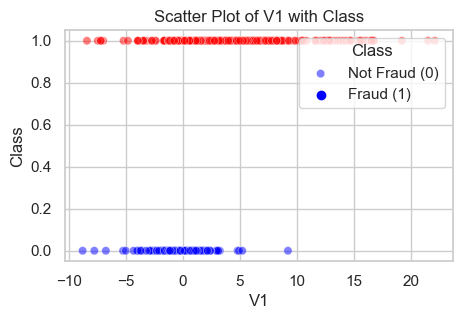

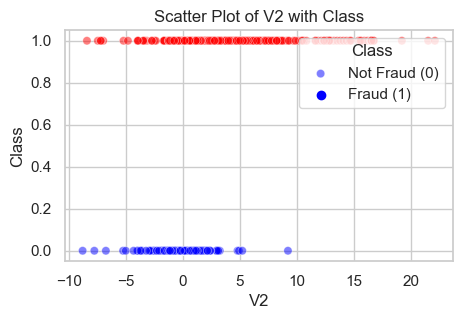

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the visualization
sns.set(style="whitegrid")
for col in ['V1', 'V2']:

# Create a scatter plot for 'V1' with different colors for each class
    plt.figure(figsize=(5, 3))
    sns.scatterplot(x='V2', y='Class', hue='Class', data=new_dataset, palette={0: 'blue', 1: 'red'}, alpha=0.5)
    plt.title('Scatter Plot of '+ col + ' with Class')
    plt.xlabel(col)
    plt.ylabel('Class')
    plt.legend(title='Class', loc='upper right', labels=['Not Fraud (0)', 'Fraud (1)'])
    plt.show()


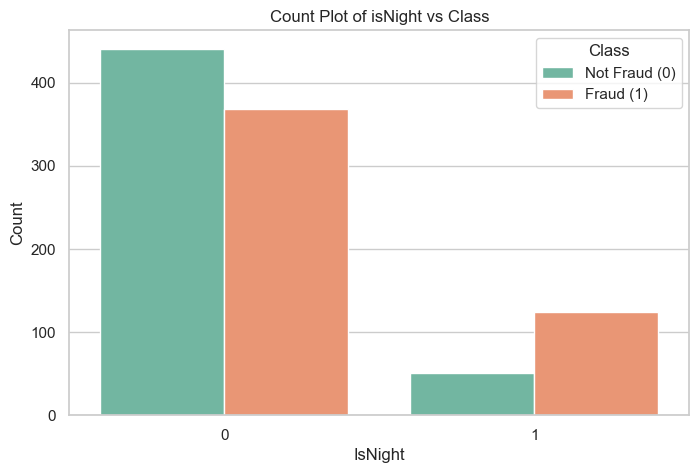

In [23]:
plt.figure(figsize=(8, 5))
sns.countplot(x='IsNight', hue='Class', data=new_dataset, palette='Set2')
plt.title('Count Plot of isNight vs Class')
plt.xlabel('IsNight')
plt.ylabel('Count')
plt.legend(title='Class', labels=['Not Fraud (0)', 'Fraud (1)'])
plt.show()

## MODEL

In [24]:
# Splitting the data into Feature and Targets
X = new_dataset.drop(columns=['Class'], axis=1)
Y = new_dataset['Class']              

In [25]:
# split the data into Training data and Test data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(984, 22) (787, 22) (197, 22)


In [26]:
# Model Training
# LogisticRegression()

# model = make_pipeline(LogisticRegression(), SVC(gamma='auto'))
model = LogisticRegression()
model.fit(X_train, Y_train)

# Model Evaluation
# accuracy on training data 
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy on training data :', training_data_accuracy)


# Model Evaluation
# accuracy on test data 
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on test data :', test_data_accuracy)

Accuracy on training data : 0.9491740787801779
Accuracy on test data : 0.9187817258883249


In [27]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))